<a href="https://colab.research.google.com/github/mralamdari/Python-Projects/blob/main/Robotics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Denavite Hartnzberg

In [ ]:
import numpy as np

In [ ]:
def DH(a, alpha_degree, d, theta_degree):
  theta = np.deg2rad(theta_degree)
  alpha = np.deg2rad(alpha_degree)
  dh_table = np.array([[np.cos(theta), -np.cos(alpha)*np.sin(theta), np.sin(alpha)*np.sin(theta), a*np.cos(theta)],
                      [np.sin(theta), np.cos(alpha)*np.cos(theta), -np.sin(alpha)*np.cos(theta), a*np.sin(theta)],
                      [0 ,np.sin(alpha), np.cos(alpha), d],
                      [0, 0, 0, 1]])
  return np.float16(dh_table)

In [ ]:
a1 =DH(0, -90, -999, 0)
a2 =DH(0, -90, -888, 90)
a3 =DH(0, 0, -777, 0)

s=np.dot(a1, a2)
np.dot(s, a3)

array([[   0.,    0.,   -1.,  777.],
       [   0.,   -1.,    0., -888.],
       [  -1.,    0.,    0., -999.],
       [   0.,    0.,    0.,    1.]], dtype=float16)

#Forwarsd Synematic

0, Scara

1, manipulator

2, cyliendrical

3, stanford

In [ ]:
def forward_scara(a1, a2, d3, d4, theta_1, theta_2, theta_4):
  A01 = DH(a1, 0, 0, theta_1)
  A12 = DH(a2, 180, 0, theta_2)
  A23 = DH(0, 0, d3, 0)
  A34 = DH(0, 0, d4, theta_4)

  T40 = np.matmul(np.matmul(A01, A12), np.matmul(A23,A34))
  return np.float16(T40)

In [ ]:
def forward_manipulator(a1, a2, theta_1, theta_2):
  A01 = DH(a1, 0, 0, theta_1)
  A12 = DH(a2, 0, 0, theta_2)

  T20 = np.matmul(A01, A12)
  return np.float16(T20)

In [ ]:
def forward_cylindrical(alpha_2, d1, d2, d3, theta_1):
  A01 = DH(0, 0, d1, theta_1)
  A12 = DH(0, alpha_2, d2, 0)
  A23 = DH(0, 0, d3, 0)

  T30 = np.matmul(np.matmul(A01, A12), A23)
  return np.float16(T30)

In [ ]:
def forward_stanford(d2, d3, theta_1, theta_2):
  A01 = DH(0, -90, 0, theta_1)
  A12 = DH(0, 90, d2, theta_2)
  A23 = DH(0, 0, d3, 0)

  T30 = np.matmul(np.matmul(A01, A12), A23)
  return np.float16(T30)

In [ ]:
def wrist(alpha_4, alpha_5, d6, theta_4, theta_5, theta_6):
  A34 = DH(0, -90, 0, theta_4)
  A45 = DH(0, 90, 0, theta_5)
  A56 = DH(0, 0, d6, theta_6)

  T63 = np.matmul(np.matmul(A34, A45), A56)
  return np.float16(T63)

In [ ]:
def forward_robotic(point, num=0, wist=False, a1=0, a2=0, a3=0, a4=0, a5=0, a6=0, alpha_1=0, alpha_2=0, alpha_3=0, alpha_4=0, alpha_5=0, alpha_6=0,  d1=0, d2=0, d3=0, d4=0, d5=0, d6=0, theta_1=0, theta_2=0, theta_3=0, theta_4=0, theta_5=0, theta_6=0):
  
  
  point=np.array(point).reshape(-1, 1)
  if num == 0:
    T0_3 = forward_scara(a1, a2, d3, d4, theta_1, theta_2, theta_4)
  elif num == 1:  
    T0_3 = forward_manipulator(a1, a2, theta_1, theta_2)
  elif num == 2:  
    T0_3 =  forward_cylindrical(alpha_2, d1, d2, d3, theta_1)
  else:  
    T0_3 = forward_stanford(d2, d3, theta_1, theta_2)

  if wist:
    T3_6 = wrist(alpha_4, alpha_5, d6, theta_4, theta_5, theta_6)
    T = np.matmul(T0_3, T3_6)
  else:
    T = T0_3

  R = T[:-1, :-1]
  d = T[:-1, -1].reshape(-1, 1)  
  res = np.matmul(R, point) + d

  return res.T[0]

In [ ]:
forward_robotic([12,23,53], num=3, wist=True, a1=2, a2=2,d1=20,d2=40, d3=30,d4=10 , theta_1=60, theta_2=-180, theta_4=25)

array([-57.68408203,  31.95996094, -83.        ])

#Tabdils and Rotations
R_x, R_y, R_z

T_x, T_y, T_z

In [ ]:
def T_x(a):
  TX = np.array([[1, 0, 0, a],
                 [0, 1, 0, 0],
                 [0, 0, 1, 0],
                 [0, 0, 0, 1]])
  return TX

In [ ]:
def T_y(b):
  TY = np.array([[1, 0, 0, 0],
                 [0, 1, 0, b],
                 [0, 0, 1, 0],
                 [0, 0, 0, 1]])
  return TY

In [ ]:
def T_z(c):
  TZ = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 1, c],
                 [0, 0, 0, 1]])
  return TZ

In [ ]:
def R_x(alpha):
  alpha = np.deg2rad(alpha)
  RX = np.array([[1, 0, 0, 0],
                 [0, np.cos(alpha), -np.sin(alpha), 0],
                 [0, np.sin(alpha), np.cos(alpha), 0],
                 [0, 0, 0, 1]])
  return np.float16(RX)  

In [ ]:
def R_y(betha):
  betha = np.deg2rad(betha)
  RY = np.array([[np.cos(betha), 0, np.sin(betha), 0],
                 [0, 1, 0, 0],
                 [-np.sin(betha), 0, np.cos(betha), 0],
                 [0, 0, 0, 1]])
  return np.float16(RY)

In [ ]:
def R_z(gamma):
  gamma = np.deg2rad(gamma)
  RZ = np.array([[np.cos(gamma), -np.sin(gamma), 0, 0],
                 [np.sin(gamma), np.cos(gamma), 0, 0],
                 [0, 0, 1, 0],
                 [0, 0, 0, 1]])
  return np.float16(RZ)  

In [ ]:
np.dot(np.dot(R_z(90),R_y(0)), R_z(45))

array([[-0.707, -0.707,  0.   ,  0.   ],
       [ 0.707, -0.707,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  1.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  1.   ]], dtype=float16)

#Inverse Synematic

0, Scara

1, RRR

2, stanford

In [ ]:
def inverse_stanford(x, y, z, a2, a3, d1=0, left=True):
  if left:
    alpha = np.arctan2(x, y)
    beta = np.arctan2(-np.sqrt(np.abs(x**2 + y**2 - d1**2)), -d1)
    theta1 = alpha + beta
  else: 
    alpha = np.arctan2(x, y)
    beta = np.arctan2(np.sqrt(np.abs(x**2 + y**2 - d1**2)), d1)
    theta1 = alpha - beta

  theta2 = np.arctan2(x**2 + y**2, z-d1)
  D3 = np.sqrt(np.abs(x**2 + y**2 + (z-d1)**2))
  return theta1, theta2, D3

In [ ]:
forward_stanford(d2=1, d3=2, theta_1=30, theta_2=45)
np.arctan2(3, 1)

1.2490457723982544

In [ ]:
def inverse_rrr(x, y, z, a2, a3, d1=0, left=True):
  if left:
    alpha = np.arctan2(x, y)
    beta = np.arctan2(-np.sqrt(np.abs(x**2 + y**2 - d1**2)), -d1)
    theta1 = alpha + beta
  else: 
    alpha = np.arctan2(x, y)
    beta = np.arctan2(np.sqrt(x**2 + y**2 - d1**2), d1)
    theta1 = alpha - beta

  D = (x**2 + y**2 - d1**2 + (z-d1)**2 - a2**2 - a3**2) / 2*a2*a3
  theta3 = np.arctan2(D, -np.sqrt(np.abs(1 - D**2)))
  theta2 = np.arctan2(np.sqrt(np.abs(x**2 + y**2 - d1**2)), z-d1) - np.arctan2(a2+a3*np.cos(theta3), a3*np.sin(theta3))
  return theta1, theta2, theta3

In [ ]:
def inverse_scara(x, y, z, d4, a1, a2, RR):
  theta2 = np.arccos((x**2 + y**2 - a1**2-a2**2)/(2*a1*a2))
  theta1 = np.arctan2(y, x) - np.arctan2(a2*np.sin(theta2), a1 + a2*np.cos(theta2))
  D3 = -z - d4
  theta4 = theta1 + theta2 - np.arctan2(RR[0][0], RR[0][1])
  return theta1, theta2, theta4

In [ ]:
def inverse_wrist(RR):
  theta5_1 =  np.arctan2(RR[2][2], np.sqrt(np.abs(1 - RR[2][2]**2)))
  theta5_2 =  np.arctan2(RR[2][2], -np.sqrt(np.abs(1 - RR[2][2]**2)))
  if theta5_1 != 0 : # none_MONFARED
    if np.sin(theta5_1)>0:
      theta4_1 = np.arctan2(RR[0][2], RR[1][2])
      theta6_1 = np.arctan2(RR[2][0], RR[2][1])
      print(f"""
      Theta4_1: {theta4_1},
      Theta5_1: {theta5_1},
      Theta6_1: {theta6_1}""")
    if np.sin(theta5_2)<0:
      theta4_2 = np.arctan2(-RR[0][2], -RR[1][2])
      theta6_2 = np.arctan2(RR[2][0], -RR[2][1])
      print(f"""
      Theta4_2: {theta4_2},
      Theta5_2: {theta5_2},
      Theta6_2: {theta6_2}""")
  else: 
    theta5 = 0
    theta4 = (np.arctan2(RR[0][0], RR[1][0])+np.arctan2(RR[0][0], -RR[1][0]))/2
    theta6 = theta4 - np.arctan2(RR[0][0], RR[1][0])
    print(f"""
      Theta4: {theta4},
      Theta5: {theta5},
      Theta6: {theta6}""")

In [ ]:
def inverse_robotic(x, y, z,RR=[], num=0, wist=False,left=True, a1=0, a2=0, a3=0, a4=0, a5=0, a6=0, d1=0, d2=0, d3=0, d4=0, d5=0, d6=0):

  if num == 0:
    T1, T2, T3 = inverse_scara(x, y, z, d4, a1, a2, RR)
  elif num == 1:  
    T1, T2, T3 = inverse_rrr(x, y, z, a2, a3, d1=0, left=True)
  else:
    T1, T2, T3 = inverse_stanford(x, y, z, a2, a3, d1=0, left=True)

  if wist:
    inverse_wrist(RR)

  return [T1, T2, T3]

In [ ]:
YT = np.array([[1, 1,3], [2,8,5],[4,7,9]])
inverse_robotic(x=2, y=3, z=4, a2=5, a3=5,a1=2, num=0, d1=1, RR=YT, wist=False)

[-1.1760052070951348, 2.498091544796509, 0.5366881743039258]

In [ ]:
inverse_robotic(x=2, y=3, z=4, a2=5, a3=5, num=1, d1=4, left=True, wist=False)

[-0.982793723247329, -2.0153104341788657, -2.3561908620481042]

In [ ]:
YT = np.array([[1, 1,3], [2,8,5],[4,7,9]])
inverse_robotic(x=2, y=3, z=4, a2=5, a3=5, num=2, d1=0, left=False, wist=True, RR=YT)


      Theta4_1: 0.5404195002705842,
      Theta5_1: 0.7885037734282083,
      Theta6_1: 0.5191461142465229


[-0.982793723247329, 1.2722973952087173, 5.385164807134504]

#Determinan

In [ ]:
np.linalg.det(np.int64(s))

1.0

#Inverse

In [ ]:
np.linalg.inv(np.int64(s))

array([[  -0.,   -0.,   -1., -999.],
       [  -0.,   -1.,   -0., -888.],
       [  -1.,   -0.,   -0.,   -0.],
       [   0.,    0.,    0.,    1.]])

#Test

In [ ]:
z = np.dot(np.dot(R_z(30),R_x(60)), R_y(90))
z
# R_y(90)
# np.arccos(-0.5)

array([[-0.433 , -0.25  ,  0.866 ,  0.    ],
       [ 0.7505,  0.433 ,  0.5   ,  0.    ],
       [-0.5   ,  0.866 ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  1.    ]], dtype=float16)

In [ ]:
# }a1 =DH(0, -90, -999, 0)
# a2 =DH(0, -90, -888, 90)
# a3 =DH(0, 0, -777, 0)

# s=np.dot(a1, a2)
# np.dot(s, a3)

a1= DH(0,0,88, 99)
a2=DH(0, -90, 44444, 0)
np.dot(a1, a2)

array([[-1.565e-01,  0.000e+00, -9.878e-01,  0.000e+00],
       [ 9.878e-01,  0.000e+00, -1.565e-01,  0.000e+00],
       [ 0.000e+00, -1.000e+00,  0.000e+00,  4.454e+04],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00]], dtype=float16)

In [ ]:
a1

array([[-0.1565, -0.988 ,  0.    , -0.    ],
       [ 0.988 , -0.1565,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  1.    , 88.    ],
       [ 0.    ,  0.    ,  0.    ,  1.    ]], dtype=float16)

# Symbolic Matrix Product

###SymPy is a Python library for symbolic mathematics. and is written in Python

#Assignment 5

In [ ]:
import sympy
import numpy as np

def initialize_symbols(links_count=2):
  symbol = ''
  for v in 'm I l lc q dq u'.split():
    for i in range(1, links_count + 1):
      symbol += f'{v}_{i} '
  symbol += 'g t'
  return sympy.symbols(symbol, real=True)

m_1, m_2, I_1, I_2, l_1, l_2, lc_1, lc_2, q_1, q_2, dq_1, dq_2, u_1, u_2, g, t = initialize_symbols(2)

In [ ]:
q = sympy.Matrix([q_1, q_2])
dq = sympy.Matrix([dq_1, dq_2])

R_1 = sympy.Matrix([[sympy.cos(q_1), -sympy.sin(q_1)],
       [sympy.sin(q_1), sympy.cos(q_1)]])

R_2 = sympy.Matrix([[sympy.cos(q_1 + q_2), -sympy.sin(q_1 + q_2)],
       [sympy.sin(q_1 + q_2), sympy.cos(q_1 + q_2)]])       

R_2

Matrix([
[cos(q_1 + q_2), -sin(q_1 + q_2)],
[sin(q_1 + q_2),  cos(q_1 + q_2)]])

In [ ]:
J_v_c1 = sympy.Matrix([[-lc_1 * sympy.sin(q_1), 0], 
          [lc_1 * sympy.cos(q_1), 0]])

J_v_c2 = sympy.Matrix([[-l_1 * sympy.sin(q_1) - lc_2 * sympy.sin(q_1+q_2), -lc_2 * sympy.sin(q_1+q_2)],
          [l_1 * sympy.cos(q_1) + lc_2 * sympy.cos(q_1+q_2), lc_2 * sympy.cos(q_1+q_2)]])
       
J_w_1 = sympy.Matrix([[1, 0], [0, 0]])
J_w_2 = sympy.Matrix([[1, 1], [0, 0]])

J_v_c2      

Matrix([
[-l_1*sin(q_1) - lc_2*sin(q_1 + q_2), -lc_2*sin(q_1 + q_2)],
[ l_1*cos(q_1) + lc_2*cos(q_1 + q_2),  lc_2*cos(q_1 + q_2)]])

In [ ]:
D = m_1 * J_v_c1.T * J_v_c1 + m_2 * J_v_c2.T * J_v_c2 + I_1 * J_w_1.T * J_w_1 + I_2 * J_w_2.T * J_w_2
D

Matrix([
[I_1 + I_2 + lc_1**2*m_1*sin(q_1)**2 + lc_1**2*m_1*cos(q_1)**2 + m_2*(-l_1*sin(q_1) - lc_2*sin(q_1 + q_2))**2 + m_2*(l_1*cos(q_1) + lc_2*cos(q_1 + q_2))**2, I_2 - lc_2*m_2*(-l_1*sin(q_1) - lc_2*sin(q_1 + q_2))*sin(q_1 + q_2) + lc_2*m_2*(l_1*cos(q_1) + lc_2*cos(q_1 + q_2))*cos(q_1 + q_2)],
[                        I_2 - lc_2*m_2*(-l_1*sin(q_1) - lc_2*sin(q_1 + q_2))*sin(q_1 + q_2) + lc_2*m_2*(l_1*cos(q_1) + lc_2*cos(q_1 + q_2))*cos(q_1 + q_2),                                                                I_2 + lc_2**2*m_2*sin(q_1 + q_2)**2 + lc_2**2*m_2*cos(q_1 + q_2)**2]])

In [ ]:
n = max(q.shape)
C = sympy.zeros(n)
for k in range(n):
  for j in range(n):
    for i in range(n):
      C[k, j] = C[k, j] + 0.5 * (sympy.diff(D[k, j], q[i]) + sympy.diff(D[k, i], q[j]) - sympy.diff(D[i, j], q[k])) * dq[i] 

C      

Matrix([
[dq_1*(0.5*m_2*(-2*l_1*sin(q_1) - 2*lc_2*sin(q_1 + q_2))*(l_1*cos(q_1) + lc_2*cos(q_1 + q_2)) + 0.5*m_2*(-l_1*sin(q_1) - lc_2*sin(q_1 + q_2))*(-2*l_1*cos(q_1) - 2*lc_2*cos(q_1 + q_2))) + dq_2*(-1.0*lc_2*m_2*(-l_1*sin(q_1) - lc_2*sin(q_1 + q_2))*cos(q_1 + q_2) - 1.0*lc_2*m_2*(l_1*cos(q_1) + lc_2*cos(q_1 + q_2))*sin(q_1 + q_2)), dq_1*(-1.0*lc_2*m_2*(-l_1*sin(q_1) - lc_2*sin(q_1 + q_2))*cos(q_1 + q_2) - 1.0*lc_2*m_2*(l_1*cos(q_1) + lc_2*cos(q_1 + q_2))*sin(q_1 + q_2)) + dq_2*(-1.0*lc_2*m_2*(-l_1*sin(q_1) - lc_2*sin(q_1 + q_2))*cos(q_1 + q_2) - 1.0*lc_2*m_2*(l_1*cos(q_1) + lc_2*cos(q_1 + q_2))*sin(q_1 + q_2))],
[                                                                                                                                                                                          dq_1*(1.0*lc_2*m_2*(-l_1*sin(q_1) - lc_2*sin(q_1 + q_2))*cos(q_1 + q_2) - 1.0*lc_2*m_2*(-l_1*cos(q_1) - lc_2*cos(q_1 + q_2))*sin(q_1 + q_2)),                                                

In [ ]:
p_1 = m_1 * g * lc_1 * sympy.sin(q_1)
p_2 = m_2 * g * (l_1 * sympy.sin(q_1) + lc_2 * sympy.sin(q_1 + q_2))
P = sympy.Matrix([p_1 + p_2])
P

Matrix([[g*lc_1*m_1*sin(q_1) + g*m_2*(l_1*sin(q_1) + lc_2*sin(q_1 + q_2))]])

In [ ]:
G = P.jacobian(q).T
G

Matrix([
[g*lc_1*m_1*cos(q_1) + g*m_2*(l_1*cos(q_1) + lc_2*cos(q_1 + q_2))],
[                                       g*lc_2*m_2*cos(q_1 + q_2)]])

In [ ]:
x = sympy.Matrix([q, dq])
f_x = sympy.Matrix([dq, -D.T * (C*dq + G)])
g_x = sympy.Matrix([sympy.zeros(max(dq.shape)), D.T])
g_x

Matrix([
[                                                                                                                                                         0,                                                                                                                                  0],
[                                                                                                                                                         0,                                                                                                                                  0],
[I_1 + I_2 + lc_1**2*m_1*sin(q_1)**2 + lc_1**2*m_1*cos(q_1)**2 + m_2*(-l_1*sin(q_1) - lc_2*sin(q_1 + q_2))**2 + m_2*(l_1*cos(q_1) + lc_2*cos(q_1 + q_2))**2, I_2 - lc_2*m_2*(-l_1*sin(q_1) - lc_2*sin(q_1 + q_2))*sin(q_1 + q_2) + lc_2*m_2*(l_1*cos(q_1) + lc_2*cos(q_1 + q_2))*cos(q_1 + q_2)],
[                        I_2 - lc_2*m_2*(-l_1*sin(q_1) - lc_2*sin(q_1 + q_2))*sin(q_1 + q_2) + lc_2*m_2*(l_1*cos(q_1) + l

In [ ]:
def dynamics_terms(links_count=2, symbolic=True, *args):
  m_1, m_2, I_1, I_2, l_1, l_2, lc_1, lc_2, q_1, q_2, dq_1, dq_2, u_1, u_2, g, t = initialize_symbols(links_count)
  q = sympy.Matrix([q_1, q_2])
  dq = sympy.Matrix([dq_1, dq_2])
  u = sympy.Matrix([u_1, u_2])
  R_1 = sympy.Matrix([[sympy.cos(q_1), -sympy.sin(q_1)],
        [sympy.sin(q_1), sympy.cos(q_1)]])

  R_2 = sympy.Matrix([[sympy.cos(q_1 + q_2), -sympy.sin(q_1 + q_2)],
        [sympy.sin(q_1 + q_2), sympy.cos(q_1 + q_2)]])       

  J_v_c1 = sympy.Matrix([[-lc_1 * sympy.sin(q_1), 0], 
            [lc_1 * sympy.cos(q_1), 0]])

  J_v_c2 = sympy.Matrix([[-l_1 * sympy.sin(q_1) - lc_2 * sympy.sin(q_1+q_2), -lc_2 * sympy.sin(q_1+q_2)],
            [l_1 * sympy.cos(q_1) + lc_2 * sympy.cos(q_1+q_2), lc_2 * sympy.cos(q_1+q_2)]])
        
  J_w_1 = sympy.Matrix([[1, 0], [0, 0]])
  J_w_2 = sympy.Matrix([[1, 1], [0, 0]])

  D = m_1 * J_v_c1.T * J_v_c1 + m_2 * J_v_c2.T * J_v_c2 + I_1 * J_w_1.T * J_w_1 + I_2 * J_w_2.T * J_w_2

  n = max(q.shape)
  C = sympy.zeros(n)
  for k in range(n):
    for j in range(n):
      for i in range(n):
        C[k, j] = C[k, j] + 0.5 * (sympy.diff(D[k, j], q[i]) + sympy.diff(D[k, i], q[j]) - sympy.diff(D[i, j], q[k])) * dq[i] 
  p_1 = m_1 * g * lc_1 * sympy.sin(q_1)
  p_2 = m_2 * g * (l_1 * sympy.sin(q_1) + lc_2 * sympy.sin(q_1 + q_2))
  P = sympy.Matrix([p_1 + p_2])

  G = P.jacobian(q).T

  # Open Loop Dynamics of the manipulator
  x = sympy.Matrix([q, dq])
  f_x = sympy.Matrix([dq, -D.T * (C*dq + G)])
  g_x = sympy.Matrix([sympy.zeros(max(dq.shape)), D.T])
  dx = f_x + g_x * u

  if symbolic:
    return D, C, G, x, dx
  else: 
    return D.subs([(i, j) for i, j in zip([m_1, m_2, I_1, I_2, l_1, l_2, lc_1, lc_2, q_1, q_2, dq_1, dq_2, u_1, u_2, g], *args)]) , C.subs([(i, j) for i, j in zip([m_1, m_2, I_1, I_2, l_1, l_2, lc_1, lc_2, q_1, q_2, dq_1, dq_2, u_1, u_2, g], *args)])  , G.subs([(i, j) for i, j in zip([m_1, m_2, I_1, I_2, l_1, l_2, lc_1, lc_2, q_1, q_2, dq_1, dq_2, u_1, u_2, g], *args)]), x.subs([(i, j) for i, j in zip([m_1, m_2, I_1, I_2, l_1, l_2, lc_1, lc_2, q_1, q_2, dq_1, dq_2, u_1, u_2, g], *args)]), dx.subs([(i, j) for i, j in zip([m_1, m_2, I_1, I_2, l_1, l_2, lc_1, lc_2, q_1, q_2, dq_1, dq_2, u_1, u_2, g], *args)])  

In [ ]:
res_d, res_c, res_g, res_x, res_dx = dynamics_terms(2, False, [1, 1, 0.25, 0.25, 0.25, 0.25, 0.5, 0.5, sympy.pi/3, sympy.pi/6, 1, 2, 3, 4, 10])
print(res_d)
print(res_c)
print(res_g)
print(res_x)
print(res_dx)

Matrix([[0.25*(-1 - 0.25*sqrt(3))**2 + 0.765625, 0.0625*sqrt(3) + 0.5], [0.0625*sqrt(3) + 0.5, 0.500000000000000]])
Matrix([[-0.125000000000000, -0.187500000000000], [0.0625000000000000, 0]])
Matrix([[3.75000000000000], [0]])
Matrix([[pi/3], [pi/6], [1], [2]])
Matrix([[1], [2], [-0.0625*(-1 - 0.25*sqrt(3))**2 + 0.24609375*sqrt(3) + 1.77734375], [1.84375 - 0.015625*sqrt(3)]])


#Regulation

In [ ]:
def regulation(switch=0, links_count=2, symbolic=True, landa=2, disturbance= sympy.Matrix([0, 0]),q_d=[], k_p=0, k_d=0, k_i=0, args_list=[]):

  q_1, q_2, dq_1, dq_2, u_1, u_2, t = sympy.symbols('q_1 q_2 dq_1 dq_2 u_1 u_2 t')
  
  D, C, G, _, _ = dynamics_terms(links_count, symbolic, args_list)

  KP = k_p * sympy.eye(D.shape[0])
  KD = k_d * sympy.eye(D.shape[0])
  KI = k_i * sympy.eye(D.shape[0])

  q = sympy.Matrix([q_1, q_2])
  dq = sympy.Matrix([dq_1, dq_2])
  u = sympy.Matrix([u_1, u_2])
  
  if switch == 0: # PD with Gravity Compensation

    q_tilde = q - q_d
    u = -KP * q_tilde - KD*dq + G

  elif switch == 1: # Inverse Dynamics Controller

    q_d = 0.5 * sympy.Matrix([sympy.sin(t), sympy.cos(t)])
    d_q_d = sympy.diff(q_d, t)
    dd_q_d = sympy.diff(d_q_d, t)
    q_tilde = q - q_d

    #v = dd_q_d + KD * (d_q_d - dq) + KP * (q_d - q) + KI / (q_d - q)
    v = dd_q_d + KD * (d_q_d - dq) + KP * (q_d - q) + KI * sympy.integrate(q_d - q, t)
    u = D * v + C * dq + G - disturbance

  elif switch == 2: # the Lyapunov-based controler
    
    q_d = 0.5 * sympy.Matrix([sympy.sin(t), sympy.cos(t)])
    d_q_d = sympy.diff(q_d, t)
    A = landa * sympy.eye(max(q_d.shape))
    q_hat = q - q_d
    d_zeta = d_q_d - A * q_hat
    dd_zeta = sympy.diff(d_zeta, t)
    sigma = dq - d_zeta
    d_hat = KI * sigma  
    d_hat[0] = 0  
    u = D * dd_zeta + C * d_zeta + G - KD * sigma - d_hat - disturbance

  else: # discontinuous Lyapunov-based controller
    
    q_d = 0.5 * sympy.Matrix([sympy.sin(t), sympy.cos(t)])
    d_q_d = sympy.diff(q_d, t)

    A = landa * sympy.eye(max(q_d.shape))
    q_hat = q - q_d
    d_zeta = d_q_d - A * q_hat
    dd_zeta = sympy.diff(d_zeta, t)
    sigma = dq - d_zeta
    d_hat = KI * sigma  
    d_hat[0] = 0  

    u = D * dd_zeta + C * d_zeta + G - KD * sigma/(sigma[0]**2 + sigma[1]**2) - disturbance


  if symbolic:
    return u
  else: 
    return u.subs([(i, j) for i, j in zip([m_1, m_2, I_1, I_2, l_1, l_2, lc_1, lc_2, q_1, q_2, dq_1, dq_2, u_1, u_2, g], args_list)])

In [ ]:
# 1
values = [1, 1, 0.25, 0.25, 0.5, 0.5, 0.25, 0.25, sympy.pi/4, 0, 0, 0, 3, 4, 9.81, 0]

# d = (0, 0)
reg1_0 = regulation(switch=1, links_count=2, symbolic=False, q_d=sympy.Matrix([sympy.pi/3, sympy.pi/3]), k_p=21, k_d=12, k_i=10, landa=2, disturbance=sympy.Matrix([0, 0]), args_list=values)

# d = (1, -1)
reg1_1 = regulation(switch=1, links_count=2, symbolic=False, q_d=sympy.Matrix([sympy.pi/3, sympy.pi/3]), k_p=21, k_d=12, k_i=10, landa=2, disturbance=sympy.Matrix([1, -1]), args_list=values)

reg1_0
# reg1_1

Matrix([
[      -2.8125*pi*t + 10.8125*sin(t) + 5.5*cos(t) - 5.90625*pi + 4.905*sqrt(2)],
[-1.09375*pi*t + 4.0625*sin(t) + 3.5625*cos(t) - 2.296875*pi + 1.22625*sqrt(2)]])

In [ ]:
# 2
values = [1, 1, 0.25, 0.25, 0.5, 0.5, 0.25, 0.25, sympy.pi/4, 0, 0, 0, 3, 4, 9.81, 0]

# d = (0, 0)
reg2_0 = regulation(switch=2, links_count=2, symbolic=False, q_d=sympy.Matrix([sympy.pi/3, sympy.pi/3]), k_p=21, k_d=2, k_i=1, landa=2, disturbance=sympy.Matrix([0, 0]), args_list=values)

# d = (1, -1)
reg2_1 = regulation(switch=2, links_count=2, symbolic=False, q_d=sympy.Matrix([sympy.pi/3, sympy.pi/3]), k_p=21, k_d=2, k_i=1, landa=2, disturbance=sympy.Matrix([1, -1]), args_list=values)

reg2_0
# reg2_1

Matrix([
[  1.0*sin(t) + 1.90625*cos(t) - pi + 4.905*sqrt(2)],
[-2.03125*sin(t) + 3.28125*cos(t) + 1.22625*sqrt(2)]])

In [ ]:
# 3 
values = [1, 1, 0.25, 0.25, 0.5, 0.5, 0.25, 0.25, sympy.pi/4, 0, 0, 0, 3, 4, 9.81, 0]

# d = (0, 0)
reg3_0 = regulation(switch=3, links_count=2, symbolic=False, q_d=sympy.Matrix([sympy.pi/3, sympy.pi/3]), k_p=21, k_d=2, k_i=1, landa=2, disturbance=sympy.Matrix([0, 0]), args_list=values)

# d = (1, -1)
reg3_1 = regulation(switch=3, links_count=2, symbolic=False, q_d=sympy.Matrix([sympy.pi/3, sympy.pi/3]), k_p=21, k_d=2, k_i=1, landa=2, disturbance=sympy.Matrix([1, -1]), args_list=values)


reg3_0
# reg3_1

Matrix([
[-1.0*sin(t) + 0.90625*cos(t) + 4.905*sqrt(2) - (-2.0*sin(t) - 1.0*cos(t) + pi)/(1.0*(0.5*sin(t) - cos(t))**2 + 1.0*(-sin(t) - 0.5*cos(t) + 0.5*pi)**2)],
[    -0.53125*sin(t) + 0.28125*cos(t) + 1.22625*sqrt(2) - (sin(t) - 2.0*cos(t))/(1.0*(0.5*sin(t) - cos(t))**2 + 1.0*(-sin(t) - 0.5*cos(t) + 0.5*pi)**2)]])

In [ ]:
# import matplotlib.pyplot as plt


# arr=[]
# for i in range(10):
#   arr.append(reg3_0.subs('t', i)[0])


# fig = plt.figure(figsize=(5, 5))
# time_range = range(0, 10)
# plt.plot(time_range, arr)

#Cubic & Quintic

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [ ]:
def cubic(start_p, end_p):
  q0, v0, t0 = start_p
  qf, vf, tf = end_p
  M = np.array([[1, t0, t0**2, t0**3],
                [0, 1, 2*t0, 3*t0**2],
                [1, tf, tf**2, tf**3],
                [0, 1, 2*tf, 3*tf**2]])
  
  initial_values = np.array([q0, v0, qf, vf]).reshape(-1, 1)
  A = np.matmul(np.linalg.inv(M) , initial_values)

  t = np.linspace(t0, tf, 100*(tf-t0))
  o = np.ones(len(t))

  q = A[0] * o + A[1] * t + A[2] * t**2 + A[3] * t**3
  v = A[1] * o + 2 * A[2] * t + 3 * A[3] * t**2
  a =  2 * A[2] * o + 6 * A[3] * t

  return q, v, a, t

In [ ]:
def quintic(start_p, end_p):
  q0, v0, t0, alpha0 = start_p
  qf, vf, tf, alphaf = end_p
  M = np.array([[1, t0, t0**2, t0**3, t0**4, t0**5],
                [0, 1, 2*t0, 3*t0**2, 4*t0**3, 5*t0**4],
                [0, 0, 2, 6*t0, 12*t0**2, 20*t0**3],
                [1, tf, tf**2, tf**3, tf**4, tf**5],
                [0, 1, 2*tf, 3*tf**2, 4*tf**3, 5*tf**4],
                [0, 0, 2, 6*tf, 12*tf**2, 20*tf**3]])
  
  initial_values = np.array([q0, v0, alpha0, qf, vf, alphaf]).reshape(-1, 1)
  A = np.matmul(np.linalg.inv(M) , initial_values)

  t = np.linspace(t0, tf, 100*(tf-t0))
  o = np.ones(len(t))

  q = A[0]*o + A[1]*t + A[2]*t**2 + A[3]*t**3 + A[4]*t**4 + A[5]*t**5 
  v = A[1]*o + 2*A[2]*t + 3*A[3]*t**2 + 4*A[4]*t**3 + 5*A[5]*t**4 
  a = 2*A[2]*o + 6*A[3]*t + 12*A[4]*t**2 + 20*A[5]*t**3 
  
  return q, v, a, t

In [ ]:
def trajectory(q0=0, v0=0, alpha0=0, qf=1, vf=1, alphaf=1, t0=0, tf=1, swich=0, via=0):

  # Initialization  
  model = ['Cubic', 'Quintic']
  via_list = [[]]*(via+2)
  if not swich:  # Cubic
    via_list[0] = [q0, v0, t0]
    via_list[-1] = [qf, vf, tf]
  else:          # Quintic
    via_list[0] = [q0, v0, t0, alpha0]
    via_list[-1] = [qf, vf, tf, alphaf]

  # Via points 
  if via > 0:
    print('Please Enter Inputs as A single point (q, v, t, alpha) ')
  for j in range(via):
    inputs = input(f'Please Enter Address {j+1}:\n')
    temp_via = list()
    try:
      for i in inputs.split():
        temp_via.append(int(i))
    except ValueError:
      print('Please Enter only int numbers.')
      return
    if len(temp_via) != 4 and swich==1:
      print('Please Enter The Right Number of elements.')
      return
    via_list[j+1] = temp_via
  via_list = np.array(via_list)  

  q, v, a, t = np.array([]), np.array([]), np.array([]), np.array([])
  for r in range(via+1):
    start_p = via_list[r]
    end_p = via_list[r+1]
    if not swich:  # Cubic
      tq, tv, ta, tt = cubic(start_p, end_p)
    else:          # Quintic
      tq, tv, ta, tt = quintic(start_p, end_p)

    # concatentate q, v, a, t with their ancestors
    q = np.concatenate((q, tq))
    v = np.concatenate((v, tv))
    a = np.concatenate((a, ta))
    t = np.concatenate((t, tt))  
    
  #Plot all three figures 
  fig = plt.figure(figsize=(15,5))
  plt.subplot(1, 3, 1)
  plt.title(f'{model[swich]} polynomial trajectory')
  plt.plot(t, q)
  plt.xlabel('time')
  plt.legend('q')

  plt.subplot(1, 3, 2)
  plt.title(f'Velocity profile for {model[swich]} polynomial trajectory')
  plt.plot(t, v)
  plt.xlabel('time')
  plt.legend('v')

  plt.subplot(1, 3, 3)
  plt.title(f'Acceleration profile for {model[swich]} polynomial trajectory')
  plt.plot(t, a)
  plt.xlabel('time')
  plt.legend('a')

  plt.show()

  return q, v, a  

Please Enter Inputs as A single point (q, v, t, alpha) 
Please Enter Address 1:
12 24 2
Please Enter Address 2:
54 100 4
Please Enter Address 3:
80 64 8


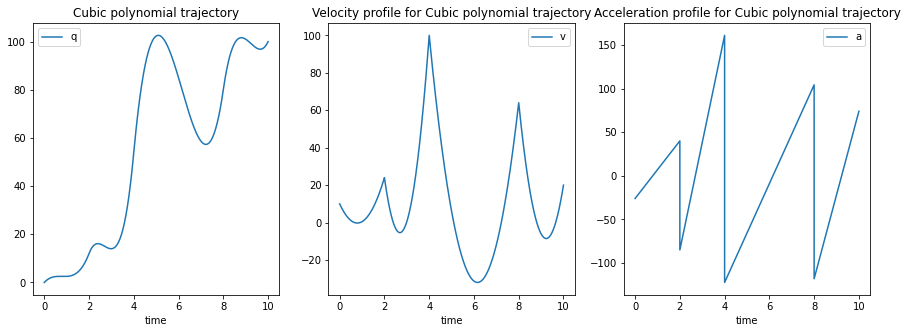

In [ ]:
Q,V,A = trajectory(q0=0, v0=10, alpha0=0, qf=100, vf=20, alphaf=10, t0=0, tf=10, swich=0, via=3)
# 12 24 2
# 54 100 4
# 80 64 8

Please Enter Inputs as A single point (q, v, t, alpha) 
Please Enter Address 1:
12 24 2 1
Please Enter Address 2:
54 100 4 3
Please Enter Address 3:
80 64 8 7


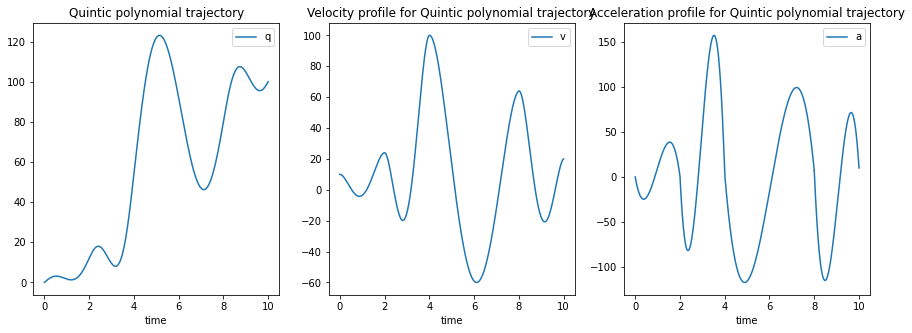

In [ ]:
Q,V,A = trajectory(q0=0, v0=10, alpha0=0, qf=100, vf=20, alphaf=10, t0=0, tf=10, swich=1, via=3)
# 12 24 2 1 
# 54 100 4 3
# 80 64 8 7

#PSO 

In [ ]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

In [ ]:
def plot_result(via, xs, xt, ys, yt, position, obstacles):
    x = np.concatenate([[xs], position[0], [xt]])
    y = np.concatenate([[ys], position[1], [yt]])
    ts = np.linspace(0, 1, via+2)
    t = np.linspace(0, 1, 100)
    spline_x = UnivariateSpline(ts, x)
    spline_y = UnivariateSpline(ts, y)
    
    xx = spline_x(t)
    yy = spline_y(t)

    fig = plt.figure(figsize=(15,5))
    plt.subplot(1, 3, 1)
    plt.plot(xx, yy, 'b-', x, y, 'ro')
    plt.xlabel('x')
    plt.ylabel('y')
    try:
      circle1 = plt.Circle((obstacles[0][0], obstacles[0][1]), obstacles[0][2], color='r')
      plt.gca().add_patch(circle1)
      circle2 = plt.Circle((obstacles[1][0], obstacles[1][1]), obstacles[1][2], color='r')
      plt.gca().add_patch(circle2)
      circle3 = plt.Circle((obstacles[2][0], obstacles[2][1]), obstacles[2][2], color='r')
      plt.gca().add_patch(circle3)
      circle4 = plt.Circle((obstacles[3][0], obstacles[3][1]), obstacles[3][2], color='r')
      plt.gca().add_patch(circle4)
      circle5 = plt.Circle((obstacles[4][0], obstacles[4][1]), obstacles[4][2], color='r')
      plt.gca().add_patch(circle5)
    except IndexError:
      pass


    plt.subplot(1, 3, 2)
    plt.plot(t, xx, 'b-', ts, x, 'ro')
    plt.xlabel('time')
    plt.legend('x')
    try:
      circle1 = plt.Circle((obstacles[0][0], obstacles[0][1]), obstacles[0][2], color='r')
      plt.gca().add_patch(circle1)
      circle2 = plt.Circle((obstacles[1][0], obstacles[1][1]), obstacles[1][2], color='r')
      plt.gca().add_patch(circle2)
      circle3 = plt.Circle((obstacles[2][0], obstacles[2][1]), obstacles[2][2], color='r')
      plt.gca().add_patch(circle3)
      circle4 = plt.Circle((obstacles[3][0], obstacles[3][1]), obstacles[3][2], color='r')
      plt.gca().add_patch(circle4)
      circle5 = plt.Circle((obstacles[4][0], obstacles[4][1]), obstacles[4][2], color='r')
      plt.gca().add_patch(circle5)
    except IndexError:
      pass

    plt.subplot(1, 3, 3)
    plt.plot(t, yy, 'b-', ts, y, 'ro')
    plt.xlabel('time')
    plt.legend('y')
    try:
      circle1 = plt.Circle((obstacles[0][0], obstacles[0][1]), obstacles[0][2], color='r')
      plt.gca().add_patch(circle1)
      circle2 = plt.Circle((obstacles[1][0], obstacles[1][1]), obstacles[1][2], color='r')
      plt.gca().add_patch(circle2)
      circle3 = plt.Circle((obstacles[2][0], obstacles[2][1]), obstacles[2][2], color='r')
      plt.gca().add_patch(circle3)
      circle4 = plt.Circle((obstacles[3][0], obstacles[3][1]), obstacles[3][2], color='r')
      plt.gca().add_patch(circle4)
      circle5 = plt.Circle((obstacles[4][0], obstacles[4][1]), obstacles[4][2], color='r')
      plt.gca().add_patch(circle5)
    except IndexError:
      pass
    plt.show()

In [ ]:
def fitness(position, obstacles):
  
  f1 = sum((np.diff(position[0]) **2 + np.diff(position[1])**2)**0.5)
  obs = 0
  for obstacle in obstacles:
    x, y, r = obstacle
    d = ((x - position[0][1:4])**2 + (y - position[1][1:4])**2)**0.5 
    temp_v = np.maximum(1-d/r, 0)
    v=np.mean(temp_v)
    obs += v
  return f1+ obs


class Particle:
  def __init__(self, via, xs, xt, ys, yt,xc, yc, r, xmin, xmax, ymin, ymax, particles_count, obstacles, seed):
    
    np.random.seed(seed)
    via_x = sorted(np.random.uniform(xmin, xmax, via))
    via_y = sorted(np.random.uniform(ymin, ymax, via))
    x = np.concatenate([[xs], via_x, [xt]])
    y = np.concatenate([[ys], via_y, [yt]])
    ts = np.linspace(0, 1, via+2)
    t = np.linspace(0, 1, particles_count)
    spline_x = UnivariateSpline(ts, x)
    spline_y = UnivariateSpline(ts, y)    
    xx = spline_x(t)
    yy = spline_y(t)

    self.position = np.array([x, y])
    self.velocity = np.zeros((2, via))
    self.fitness = fitness(self.position, obstacles)
    self.best_part_pos = self.position[:, 1:-1].copy()
    self.best_part_fitnessVal = self.fitness # best fitness

    if seed==0:
      fig = plt.figure(figsize=(15,5))
      plt.subplot(1, 3, 1)
      plt.plot(xx, yy, 'b-', x, y, 'ro')
      plt.xlabel('x')
      plt.ylabel('y')

      plt.subplot(1, 3, 2)
      plt.plot(t, xx, 'b-', ts, x, 'ro')
      plt.xlabel('time')
      plt.legend('x')

      plt.subplot(1, 3, 3)
      plt.plot(t, yy, 'b-', ts, y, 'ro')
      plt.xlabel('time')
      plt.legend('y')

      plt.show()

    

def pso(via, xs, xt, ys, yt,xc, yc, r, xmin, xmax, ymin, ymax, number_pop, max_iter, particles_count, obstacles):
  # hyper parameters Inetialization
  w = 0.729    # inertia
  c1 = 1.49445 # cognitive (particle)
  c2 = 1.49445 # social (swarm)
  
  xmin=xs
  xmax=xt
  ymin=ys
  ymax=yt

  velmax_x = 0.1 * (xmax - xmin)
  velmin_x = 0.1 * (xmin - xmax)
 
  velmax_y = 0.1 * (ymax - ymin)
  velmin_y = 0.1 * (ymin - ymax)
 
  # create n random particles
  swarm = np.array([Particle(via, xs, xt, ys, yt,xc, yc, r ,xmin, xmax, ymin, ymax, particles_count, obstacles, i) for i in range(number_pop)])
  best_swarm_pos = np.zeros(via, dtype=float)
  best_swarm_fitnessVal=float('inf') #swarm best is the biggest number at first

  # computer best particle of swarm and it's fitness
  for i in range(number_pop): # check each particle
    if swarm[i].fitness < best_swarm_fitnessVal:
      best_swarm_fitnessVal = swarm[i].fitness
      best_swarm_pos = swarm[i].position[:, 1:-1].copy()
 
  # main loop of pso
  Iter = 0
  while Iter <= max_iter:

    if Iter % 50 == 0:
      print(f"Iteration = {Iter}, best fitness : {round(best_swarm_fitnessVal, 4)}")

    Iter += 1
    for i in range(number_pop): 

      ############################### X Part
      r1, r2 = np.random.rand(via), np.random.rand(via)   
      swarm[i].velocity[0] = ((w * swarm[i].velocity[0]) +
                                (c1 * r1 * (swarm[i].best_part_pos[0] - swarm[i].position[0][1:-1])) + 
                                (c2 * r2 * (best_swarm_pos[0] - swarm[i].position[0][1:-1]))) 
      
      #Update Velocity Bounds
      swarm[i].velocity[0] = np.maximum(swarm[i].velocity[0], velmin_x)
      swarm[i].velocity[0] = np.minimum(swarm[i].velocity[0], velmax_x)
      
      #Update Position
      swarm[i].position[0][1:-1] = swarm[i].position[0][1:-1] + swarm[i].velocity[0]

      #Velocity Mirroring
      outOfRange = (swarm[i].position[0][1:-1] < np.tile(xmin, via)) | (swarm[i].position[0][1:-1] > np.tile(xmax, via))
      swarm[i].velocity[0][outOfRange] = -swarm[i].velocity[0][outOfRange]

      #Update Position Bounds
      swarm[i].position[0][1:-1] = np.maximum(swarm[i].position[0][1:-1], xmin)
      swarm[i].position[0][1:-1] = np.minimum(swarm[i].position[0][1:-1], xmax)


      ############################### Y Part
      r1, r2 = np.random.rand(via), np.random.rand(via)   
      swarm[i].velocity[1] = ((w * swarm[i].velocity[1]) +
                                (c1 * r1 * (swarm[i].best_part_pos[1] - swarm[i].position[1][1:-1])) + 
                                (c2 * r2 * (best_swarm_pos[0] - swarm[i].position[1][1:-1]))) 
      
      #Update Velocity Bounds
      swarm[i].velocity[1] = np.maximum(swarm[i].velocity[1], velmin_y)
      swarm[i].velocity[1] = np.minimum(swarm[i].velocity[1], velmax_y)
      
      #Update Position
      swarm[i].position[1][1:-1] =swarm[i].position[1][1:-1] + swarm[i].velocity[1]

      #Velocity Mirroring
      outOfRange = (swarm[i].position[1][1:-1] < np.tile(ymin, via)) | (swarm[i].position[1][1:-1] > np.tile(ymax, via))
      swarm[i].velocity[1][outOfRange] = -swarm[i].velocity[1][outOfRange]
      #Update Position Bounds
      swarm[i].position[1][1:-1] = np.maximum(swarm[i].position[1][1:-1], ymin)
      swarm[i].position[1][1:-1] = np.minimum(swarm[i].position[1][1:-1], ymax)

      ##################################### Evaluation
      # compute fitness of new position
      swarm[i].fitness = fitness(swarm[i].position, obstacles)
 
      # is new position a new best particle?
      if swarm[i].fitness < swarm[i].best_part_fitnessVal:
        swarm[i].best_part_fitnessVal = swarm[i].fitness
        swarm[i].best_part_pos = swarm[i].position[:, 1:-1].copy()

        if swarm[i].fitness < best_swarm_fitnessVal:
          best_swarm_fitnessVal = swarm[i].fitness
          best_swarm_pos = swarm[i].position[:, 1:-1].copy()

  return best_swarm_pos

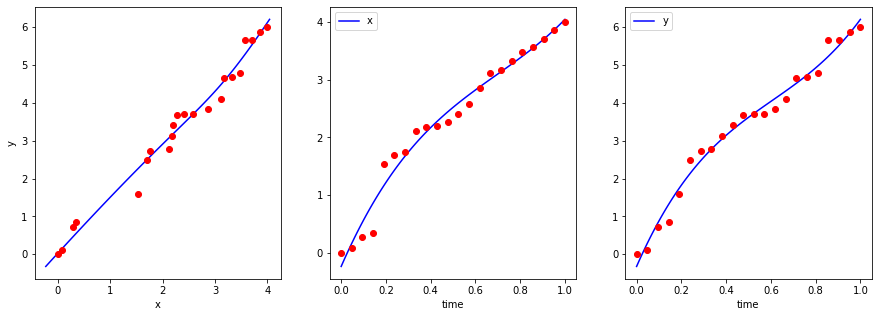

Iteration = 0, best fitness : 7.6016
Iteration = 50, best fitness : 7.4858
Iteration = 100, best fitness : 7.4608


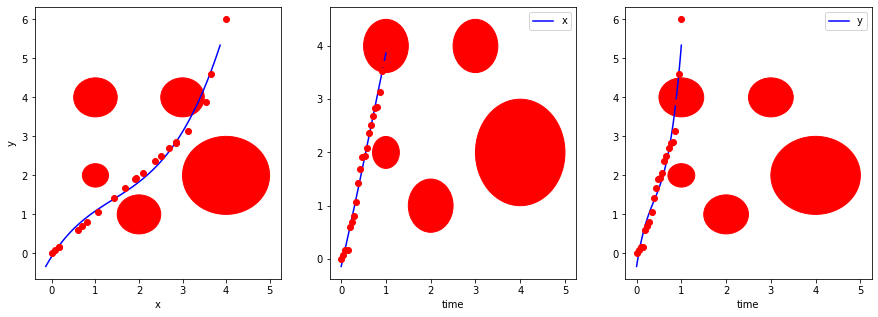

In [ ]:
via=20
#obstacles = np.array([[2, 1, 1]])
# obstacles = np.array([[2, 1, 1], [1, 4, 1]])
# obstacles = np.array([[2, 1, 0.5], [1, 4, 1]])
# obstacles = np.array([[2, 1, 0.5], [1, 4, 0.5]])
# obstacles = np.array([[2, 2, 0.5], [3, 3, 0.5]])
#obstacles = np.array([[1, 3, 0.5], [3, 3, 0.5]])
# obstacles = np.array([[3, 6, 0.5], [3, 3, 0.5]])
#obstacles = np.array([[2, 1, 0.5], [1, 4, 0.5], [2, 5, 0.5]])
# obstacles = np.array([[2, 1, 0.5], [1, 4, 0.5], [2, 5, 0.5], [4, 2, 1]])
#obstacles = np.array([[2, 1, 0.5], [1, 4, 0.5], [2, 5, 0.5], [4, 2, 0.5]])
# obstacles = np.array([[2, 1, 0.5], [1, 4, 0.5], [2, 5, 0.5], [4, 2, 1], [1, 2, 0.3]])
obstacles = np.array([[2, 1, 0.5], [1, 4, 0.5], [3, 4, 0.5], [4, 2, 1], [1, 2, 0.3]])  #via=20

best_position = pso(xs=0, xt=4, ys=0, yt=6,xc=2, yc=2, r=2, max_iter=100, number_pop=200,  particles_count=100, via=via, xmin=0, xmax=10.0, ymin=0, ymax=10.0, obstacles=obstacles)
plot_result(via, xs=0, xt=4, ys=0, yt=6, position=best_position, obstacles=obstacles)

#Genetic Algorithm

Generation 1: 0.002466037357477348, distance: 1299.575900454896
Generation 2: 0.002466037357477348, distance: 1299.575900454896
Generation 3: 0.002466037357477348, distance: 1299.575900454896
Generation 4: 0.002466037357477348, distance: 1299.575900454896
Generation 5: 0.002466037357477348, distance: 1299.575900454896
Generation 6: 0.002466037357477348, distance: 1299.575900454896
Generation 7: 0.002466037357477348, distance: 1299.575900454896
Generation 8: 0.002466037357477348, distance: 1299.575900454896
Generation 9: 0.002466037357477348, distance: 1299.575900454896
Generation 10: 0.0025741649707126317, distance: 1088.6152375533422
Generation 11: 0.0025741649707126317, distance: 1088.6152375533422
Generation 12: 0.0025741649707126317, distance: 1088.6152375533422
Generation 13: 0.0025741649707126317, distance: 1088.6152375533422
Generation 14: 0.0025741649707126317, distance: 1088.6152375533422
Generation 15: 0.0025741649707126317, distance: 1088.6152375533422
Generation 16: 0.00257

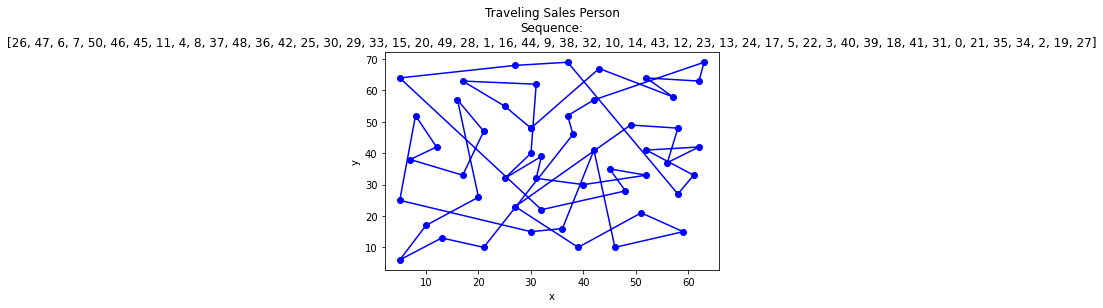

In [ ]:
import random
import matplotlib.pyplot as plt

coordinates = list()
with open('TSP51.txt') as db:
    tem_cities = db.readlines()
for item in tem_cities:
    tem = item[:-1].split(' ')
    coordinates.append((float(tem[1]), float(tem[2])))


class Path:
    def __init__(self, order):
        self.order = order
        self.distance = 0
        self.fitness = 0

    def __repr__(self):
        return f"PathOrder is: {self.order}, Fitness : {self.fitness}, Distance : {self.distance}"


def initialiazation(path, popCount):
    population = [path]
    for i in range(popCount):
        newPath = path.order[:]
        while any([pop.order == newPath for pop in population]):
            random.shuffle(newPath)
        population.append((Path(newPath)))
    return population


def calculateDistance(path):
    summ = 0
    for i in range(len(path.order) - 1):
        first = path.order[i]
        second = path.order[i + 1]
        distance = ((coordinates[second][0] - coordinates[first][0]) ** 2 + (coordinates[second][1] - coordinates[first][1]) ** 2) ** 0.5
        summ += distance
    path.distance = summ
    return summ


def calculateFitness(pop):
    total = 0
    for path in pop:
        distance = calculateDistance(path) + 1
        total += 1 / distance
        path.fitness = 1 / distance
    for path in pop:
        path.fitness /= total
    pop.sort(key=lambda city: city.fitness, reverse=True)
    return pop

def select(pop):
    randNum = random.random()
    ranIndex = random.randint(0, int(len(pop)*0.3) + 1)
    if randNum <= 0.7:
        return pop[ranIndex]
    return pop[len(pop) - ranIndex - 1]


def crossOver(pop, half=True):
    parentA, parentB = select(pop), select(pop)
    start, end = 0, len(parentA.order)//2
    while parentA == parentB:
        parentA = select(pop)
    if half:
        start = random.randint(0, len(parentA.order) - 1)
        end = random.randint(start, len(parentA.order))
    child = parentA.order[start:end]
    for i in parentB.order:
        if i not in child:
            child.append(i)
    return Path(child)


def mutation(path, mutationRate):
    start = random.randint(0, len(path.order) - 1)
    end = random.randint(0, len(path.order) - 1)
    while end == start:
        end = random.randint(0, len(path.order) - 1)
    # end = random.randint(start, len(path.order))
    if random.random() < mutationRate:
        temp = path.order[start]
        path.order[start] = path.order[end]
        path.order[end] = temp
    return path

def geneticAlgorithm(path, popCount, genCount, errRepitationPercentage, mutationRate):
    path = Path(path)
    population = initialiazation(path, popCount)
    population = calculateFitness(population)
    bestPopulation = population[0]
    print(f"Generation 1: {bestPopulation.fitness}, distance: {bestPopulation.distance}")
    errRepitation = 0
    for i in range(2, genCount + 1):
        print(f"Generation {i}: {bestPopulation.fitness}, distance: {bestPopulation.distance}")
        newGeneration = list()
        for j in range(popCount):
            child = crossOver(population)
            newGeneration.append((mutation(child, mutationRate)))
        population = calculateFitness(newGeneration)
        if population[0].fitness > bestPopulation.fitness:
            bestPopulation = population[0]
            errRepitation = 0
        else:
            errRepitation += 1
        if errRepitation > (genCount * errRepitationPercentage):
            break
    return bestPopulation


# Plotting the best path found
def plotData(path):
    x = []
    y = []
    for i in range(len(path.order)):
        x.append(coordinates[path.order[i]][0])
        y.append(coordinates[path.order[i]][1])
    x.append(coordinates[path.order[0]][0])
    y.append(coordinates[path.order[0]][1])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Traveling Sales Person\nSequence:\n{path.order}")
    plt.plot(x, y, "bo-")
    plt.show()


# program entry point
if __name__ == "__main__":
    cities = list(range(len(coordinates)))
    best = geneticAlgorithm(path=cities, popCount=505, genCount=500, errRepitationPercentage=0.5, mutationRate=0.01)
    plotData(best)
